In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dataset = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
dataset['cleaned_resume'] = ''
dataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [20]:
print ("Displaying the distinct categories of resume:\n\n ")
print (dataset['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [21]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (dataset['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Operations Manager           40
Sales                        40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


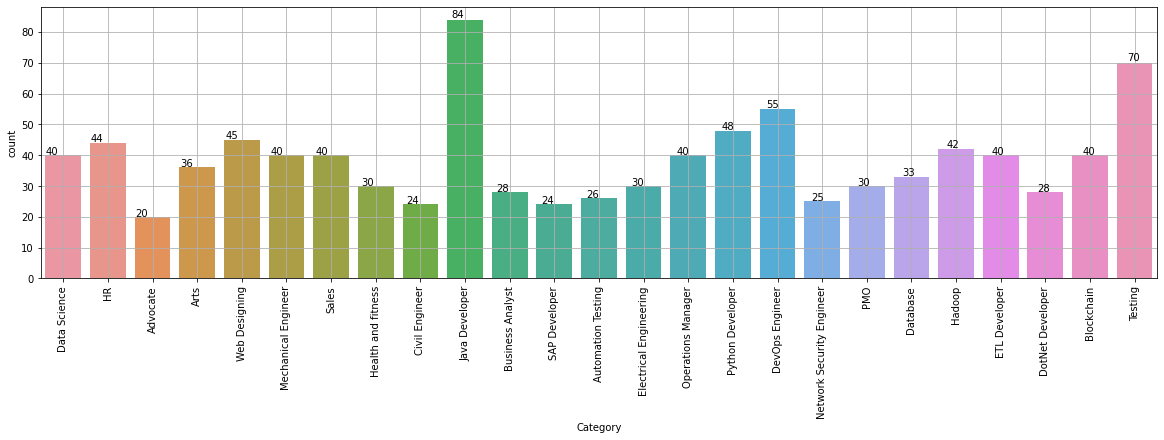

In [22]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category",data=dataset)
for t in ax.patches:
    ax.annotate(str(t.get_height()), (t.get_x()*1.01 , t.get_height()*1.01))
plt.grid()


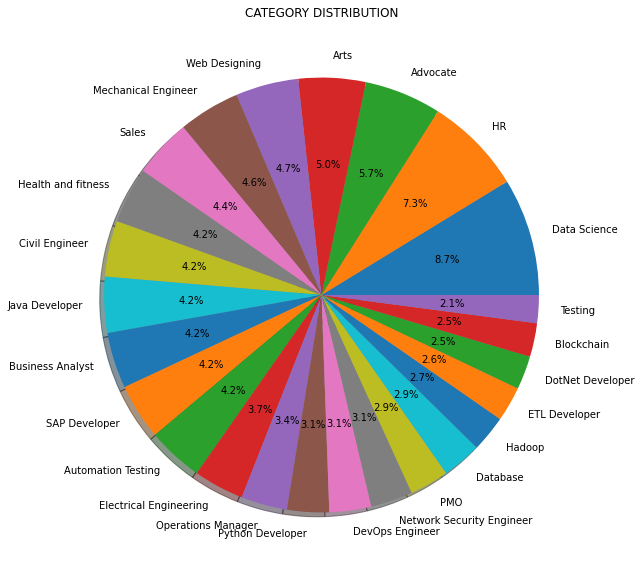

In [23]:
from matplotlib.gridspec import GridSpec
targetCounts = dataset['Category'].value_counts()
targetLabels  = dataset['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('rainbow')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [11]:
# [] A set of characters
# \ Signals a special sequence (can also be used to escape special characters)
# . Any character (except newline character)
# ^ Starts with
# $ Ends with
# * Zero or more occurrences
# + One or more occurrences
# {} Exactly the specified number of occurrences
# | Either or
# () Capture and group
# Special Sequences
# \A Returns a match if the specified characters are at the beginning of the string
# \b Returns a match where the specified characters are at the beginning or at the end of a word r"ain\b"
# \B Returns a match where the specified characters are present, but NOT at the beginning (or at the end) of a word

# \d Returns a match where the string contains digits (numbers from 0-9)
# \D Returns a match where the string DOES NOT contain digits
# \s Returns a match where the string contains a white space character
# \S Returns a match where the string DOES NOT contain a white space character
# \w Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
# \W Returns a match where the string DOES NOT contain any word characters
# \Z Returns a match if the specified characters are at the end of the string

In [29]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
dataset['cleaned_resume'] = dataset.Resume.apply(lambda x: cleanResume(x))

In [81]:
dataset.tail()

962


In [31]:
dataset1=dataset.copy()


In [39]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/aryan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aryan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [84]:
import nltk
import string
from wordcloud import WordCloud
allstopwords=set(stopwords.words('english')+["``","''"])
totalwords=[]
sentences=dataset['cleaned_resume'].values
all_sentence=""
for sentence in sentences:
    currwords=nltk.word_tokenize(sentence)
    all_sentence+=sentence
    for word in currwords:
        if word not in allstopwords and word not in string.punctuation:
            totalwords.append(word)
wordfreq=nltk.FreqDist(totalwords)
print(len(set(totalwords)))


10002


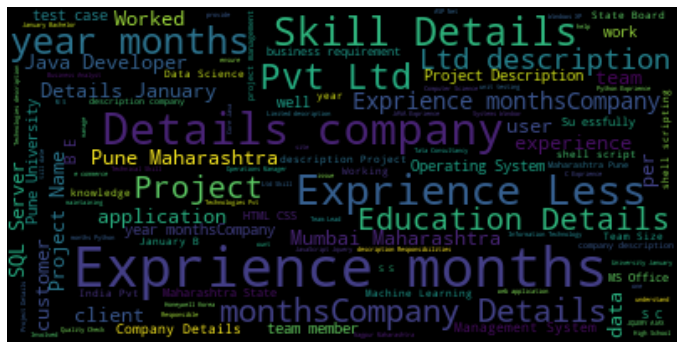

In [62]:
wc=WordCloud().generate(all_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder
var_mod=['Category']
le=LabelEncoder()
for i in var_mod:
    dataset[i]=le.fit_transform(dataset[i])

Category


In [68]:
dataset['Category'].value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

In [69]:
dataset1['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Operations Manager           40
Sales                        40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
x=dataset['cleaned_resume'].values
y=dataset['Category'].values
word_vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(x)
word_features=word_vectorizer.transform(x)
x_train,x_test,y_train,y_test=train_test_split(word_features,y,random_state=42,test_size=0.2,shuffle=True,stratify=y)
print(word_features.shape)

(962, 7351)


In [90]:
classifier=OneVsRestClassifier(KNeighborsClassifier())
classifier.fit(x_train,y_train)
prediction=classifier.predict(x_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(classifier.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(classifier.score(x_test, y_test)))
print(y_test[0])

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98
10


(1, 7351)
